<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter7/Silverkite.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#!pip install greykite

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

In [17]:
import pandas as pd

owid_covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
owid_covid["date"] = pd.to_datetime(owid_covid["date"])

In [18]:
owid_covid.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [19]:
owid_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [20]:
df = owid_covid[owid_covid.location == "France"].set_index("date", drop=True).resample('D').interpolate(method='linear')

In [28]:
df.head(5)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,FRA,Europe,France,2.0,2.0,NaN,NaN,NaN,NaN,0.030,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2020-01-25,FRA,Europe,France,3.0,1.0,NaN,NaN,NaN,NaN,0.044,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2020-01-26,FRA,Europe,France,3.0,0.0,NaN,NaN,NaN,NaN,0.044,...,30.1,35.6,NaN,5.98,82.66,0.901,-3599.600000,-6.610000,-7.740000,-53.276695
2020-01-27,FRA,Europe,France,3.0,0.0,NaN,NaN,NaN,NaN,0.044,...,30.1,35.6,NaN,5.98,82.66,0.901,-3717.371429,-6.597143,-7.515714,-55.019798
2020-01-28,FRA,Europe,France,4.0,1.0,NaN,NaN,NaN,NaN,0.059,...,30.1,35.6,NaN,5.98,82.66,0.901,-3835.142857,-6.584286,-7.291429,-56.762901


In [21]:
from greykite.framework.templates.autogen.forecast_config import (
    ForecastConfig, MetadataParam
)

metadata = MetadataParam(
    time_col="date",
    value_col="new_cases",
    freq="D"
)

In [22]:
import warnings
from greykite.framework.templates.forecaster import Forecaster
from greykite.framework.templates.model_templates import ModelTemplateEnum

forecaster = Forecaster()

warnings.filterwarnings("ignore", category=UserWarning)
result = forecaster.run_forecast_config(
    df=df.reset_index(),
    config=ForecastConfig(
        model_template=ModelTemplateEnum.SILVERKITE_DAILY_90.name,
        forecast_horizon=90,
        coverage=0.95,
        metadata_param=metadata,
    )
)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/sharanh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning:

invalid value encountered in reciprocal

/Users/sharanh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning:

invalid value encountered in reciprocal

/Users/sharanh/opt/anaconda3/lib/python3.8/site-packages/greykite/sklearn/transform/null_transformer.py:177: RuntimeWarning:

Input data has many null values. Missing 10.64% of one input.



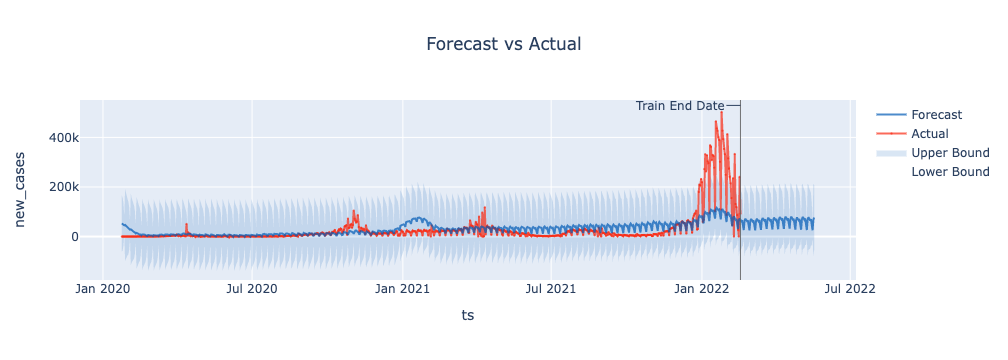

In [23]:
forecast = result.forecast
forecast.plot().show()  # leave out the renderer argument if you are not on google colab!

In [24]:
forecast.df.head().round(2)

,date,actual,forecast,forecast_lower,forecast_upper
0,2020-01-24,2.0,52922.02,-60985.27,166829.31
1,2020-01-25,1.0,49708.83,-56779.08,156196.74
2,2020-01-26,0.0,49292.10,-36762.79,135346.99
3,2020-01-27,0.0,45328.52,9582.37,81074.68
4,2020-01-28,1.0,46811.43,-97977.27,191600.14


In [25]:
from collections import defaultdict

backtest = result.backtest
backtest_eval = defaultdict(list)
for metric, value in backtest.train_evaluation.items():
    backtest_eval[metric].append(value)
    backtest_eval[metric].append(backtest.test_evaluation[metric])
metrics = pd.DataFrame(backtest_eval, index=["train", "test"]).T
metrics.head()

,train,test
CORR,0.478845,0.368066
R2,0.018644,-1.147389
MSE,211547893.353903,42683046965.568977
RMSE,14544.686086,206598.758383
MAE,10633.316646,151900.83739


In [26]:
model = result.model
future_df = result.timeseries.make_future_dataframe(
    periods=4,
    include_history=False
)
model.predict(future_df)

/Users/sharanh/opt/anaconda3/lib/python3.8/site-packages/greykite/sklearn/transform/null_transformer.py:177: RuntimeWarning:

Input data has many null values. Missing 100.00% of one input.



,ts,forecast,forecast_lower,forecast_upper,y_quantile_summary,err_std
0,2022-02-18,62163.391834,-51743.896192,176070.679860,"(-51743.896192015935, 176070.67985975044)",58117.031193
1,2022-02-19,65788.119580,-40699.786369,172276.025529,"(-40699.78636945493, 172276.02552885315)",54331.562615
2,2022-02-20,48004.993517,-38049.897292,134059.884325,"(-38049.89729206746, 134059.8843254568)",43906.363325
3,2022-02-21,26373.923595,-9372.228287,62120.075477,"(-9372.228287311747, 62120.07547744541)",18238.167724


In [27]:
model.predict(future_df)

/Users/sharanh/opt/anaconda3/lib/python3.8/site-packages/greykite/sklearn/transform/null_transformer.py:177: RuntimeWarning:

Input data has many null values. Missing 100.00% of one input.



,ts,forecast,forecast_lower,forecast_upper,y_quantile_summary,err_std
0,2022-02-18,62163.391834,-51743.896192,176070.679860,"(-51743.896192015935, 176070.67985975044)",58117.031193
1,2022-02-19,65788.119580,-40699.786369,172276.025529,"(-40699.78636945493, 172276.02552885315)",54331.562615
2,2022-02-20,48004.993517,-38049.897292,134059.884325,"(-38049.89729206746, 134059.8843254568)",43906.363325
3,2022-02-21,26373.923595,-9372.228287,62120.075477,"(-9372.228287311747, 62120.07547744541)",18238.167724
